In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream


#### insert client info and token info ####
consumer_key = 'key'
consumer_secret = 'key'
access_token = 'key'
access_token_secret = 'key'



class StdOutListener(StreamListener):
    def __init__(self, path=None):
        self.path = path

    def on_data(self, data):
        f = open('test2.txt', 'w')   #### define a name for the text notepad, it will be automatically saved to your directory
        f.write(data)
        f.close()

    def on_error(self, status):
        print (status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)
    stream.filter(track=['#NowPlaying','#Spotify','#Listeningto'])


    
#### note, you will have to manually interrupt this code so it stop streaming, and then continue to next step 


        

KeyboardInterrupt: 

In [32]:
tweets_data2 = []
tweets_file = open('test2.txt', "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data2.append(tweet)
    except:
        continue
        

In [33]:
### take a look at one tweet ###
print(tweets_data2[:1])

[{'created_at': 'Mon Nov 20 01:22:18 +0000 2017', 'id': 932418792897966080, 'id_str': '932418792897966080', 'text': '♬ Julio Di Benedetto - Ryokan ♬ https://t.co/pgEFbg7j2d #nowplaying', 'source': '<a href="http://somafm.com" rel="nofollow">BigUrl</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 6690422, 'id_str': '6690422', 'name': 'cliqhop', 'screen_name': 'cliqhop', 'location': 'San Francisco', 'url': 'http://somafm.com', 'description': "IDM: Blips'n'beeps backed mostly w/beats. Intelligent Dance Music. On SomaFM.", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 521, 'friends_count': 20, 'listed_count': 52, 'favourites_count': 0, 'statuses_count': 976303, 'created_at': 'Sat Jun 09 06:20:31 +0000 2007', 'utc_offset': -28800, 'time_zone': 'Pacific Time (US & Canada)', 'geo_enabled': False, 'lang':

In [7]:
### turn list into data frame and retrieve information basing on name ##
tweets=pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['time_stamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['source'] = list(map(lambda tweet: tweet['source'], tweets_data))
tweets['id'] = list(map(lambda tweet: tweet['id'], tweets_data))

In [8]:
print(tweets)

                                                    text lang         country  \
0      #nowplaying #deephouse #housemusic #deep house...   en            None   
1      #NowPlaying Black Label Society - Room Of Nigh...   en            None   
2      #NowPlaying Bohemian Like You - The Dandy Warh...   en            None   
3      ♬ Ulrich Schnauss - Never Be the Same ♬ https:...   de            None   
4      DENGARKAN https://t.co/4Cn2KoKRCg #NP Pasto - ...   in            None   
5      RT @LDNNOISE: Chanyeol, Punch, Henry, Chen &am...   en            None   
6      #NowPlaying Breathtaking By Latif On #RnBHitsR...   en            None   
7      #NowPlaying Hotaru by KinKi Kids on J-Pop Powe...   en            None   
8      RT @LDNNOISE: Chanyeol, Punch, Henry, Chen &am...   en            None   
9      Alaine - Hold A Vibes https://t.co/CEyRWb6QSi ...   en            None   
10     #NowPlaying “The Heat (I Wanna Dance With Some...   en            None   
11     #NowPlaying Teen Age 

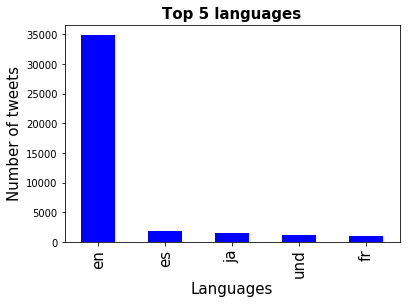

In [9]:
import matplotlib.pyplot as plt

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='blue')
plt.show()

In [12]:
import re

#### there are some noise basing retrieved back, we use regex to clean the text filed and filter down to more specific tweets 

def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search

data2=[]

for i,j in enumerate(tweets['text']):
    if (findWholeWord('by')(j)  ) :
        #print(i,j, tweets['lang'].iloc[i],tweets['country'].iloc[i])
        data2.append([i,j, tweets['lang'].iloc[i],tweets['country'].iloc[i]]) 

In [13]:
data3 = pd.Series(data2)
data5=[]
for i in data3:
    m = re.search('#NowPlaying\s(.+?)\sby\s(.+?)\son', str(i))
    if m:
        data5.append([m.group(1),m.group(2),i[2],i[3]])

data5=pd.DataFrame(data5)
data5.columns=['song','artist','tweet_language','tweet_location']

In [14]:
print(data5)

                                             song  \
0                                          Hotaru   
1        “The Heat (I Wanna Dance With Somebody)”   
2                                          “Sing”   
3                             “Tell Your Friends”   
4             the video “Esmaa Menne [Exclusive]”   
5                                     “Wana Maak”   
6                                     “Sadaateny”   
7                                            OVER   
8                 He's The Law (you're Next Punk)   
9                               This Woman's Work   
10                He's The Law (you're Next Punk)   
11                   Jesus Lives @chrisgraysinger   
12                                     : Breakout   
13                                    Majikkumira   
14                                  “Cherophobia”   
15                                          “Tay”   
16                     “Look What You Made Me Do”   
17                                   Just In C